In [1]:
import pandas as pd
from matplotlib import cm
import numpy as np
from math import floor, ceil
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from Preprocess import *

## MLP

['Slight-Right-Turn' 'Slight-Right-Turn' 'Slight-Right-Turn' ...,
 'Slight-Right-Turn' 'Move-Forward' 'Move-Forward']
Iteration 1, loss = 1.30230142
Iteration 2, loss = 0.38833965
Iteration 3, loss = 0.24142867
Iteration 4, loss = 0.26965947
Iteration 5, loss = 0.18592871
Iteration 6, loss = 0.19490749
Iteration 7, loss = 0.17057513
Iteration 8, loss = 0.16070078
Iteration 9, loss = 0.13579829
Iteration 10, loss = 0.15248509
Iteration 11, loss = 0.17284178
Iteration 12, loss = 0.13145958
Iteration 13, loss = 0.19950494
Iteration 14, loss = 0.22650243
Iteration 15, loss = 0.15679736
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.


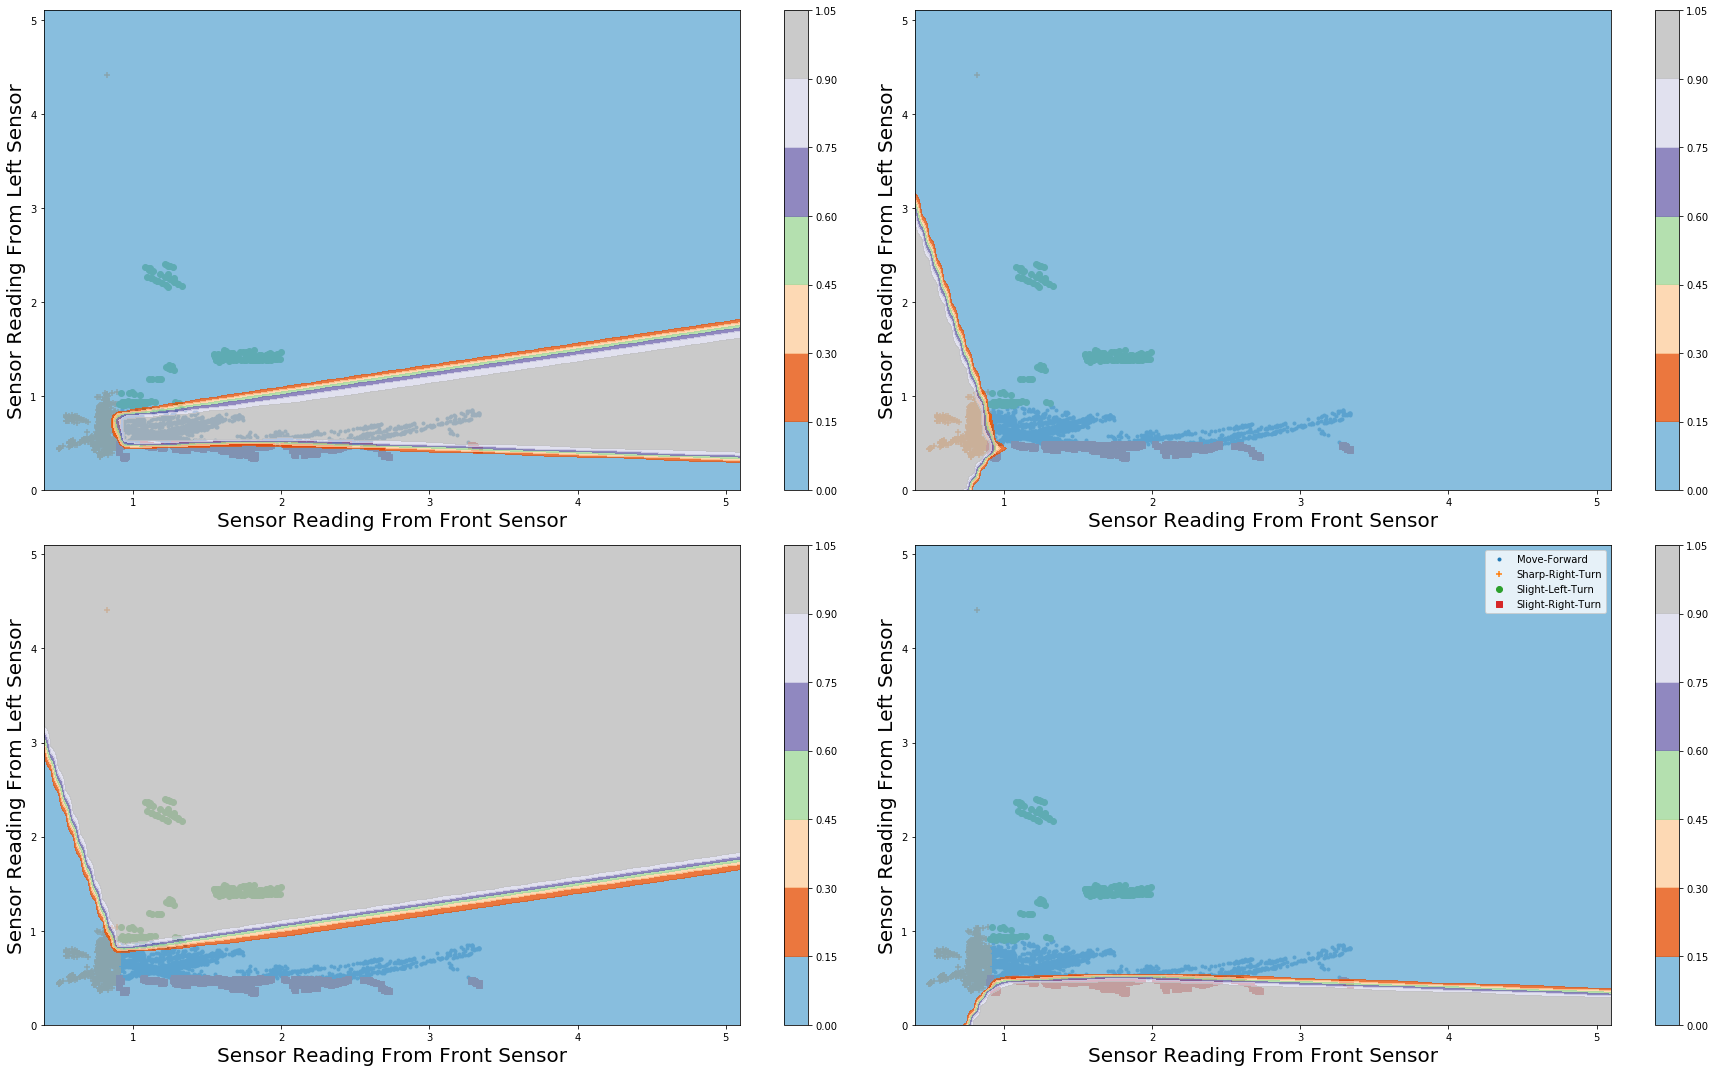

Training set score: 0.961663
Test set score: 0.956025


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

file1=['./data/robot/','2.csv']

X_train, X_test, y_train, y_test = read_data(file1[0])
print y_train
X=np.concatenate((X_train,X_test), axis=0)
y=np.concatenate((y_train,y_test), axis=0)


mlp = MLPClassifier(hidden_layer_sizes=(100,100,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

label=mlp.classes_


figure = plt.figure(figsize=(25, 15))
h=0.05
x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() +.1
x2_min, x2_max =X.T[1].min() - .1, X.T[1].max() + .1
xx, yy = np.meshgrid(np.arange(x1_min-1, x1_max+1, h),np.arange(x2_min-1, x2_max+1, h))
cmap1 = plt.cm.RdBu
cmap2 = plt.cm.Set2
cmap3 = plt.cm.tab20c

for i in xrange(0,4):
    ax = plt.subplot(2, 2, i+1)
    # ax.set_title("Input data")
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
    ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
    ax.set_xlabel('Sensor Reading From Front Sensor',size=20)
    ax.set_ylabel('Sensor Reading From Left Sensor',size=20)
    markers=['.','+','o',',']
    for j in range(0,len(label)):
#         index=(y_test==label[j])
#         ax.scatter(X_test[index].T[0], X_test[index].T[1] ,cmap=cmap1,marker=markers[j],label=label[j])
        
        index=(y_train==label[j])
        ax.scatter(X_train[index].T[0], X_train[index].T[1] ,cmap=cmap1,marker=markers[j],label=label[j])
        ax.set_xlim(x1_min, x1_max)
        Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, i]
        Z = Z.reshape(xx.shape)
#     Zs=read_output('rf_robot2_1_Z')
#     Z=np.minimum(Z, Zs)
    cntr1 = ax.contourf(xx, yy, Z, cmap=cmap3, alpha=.8)
    cbar0 = plt.colorbar( cntr1,)
plt.legend()
plt.tight_layout()
plt.show()


print("Training set score: %f" % mlp.score(X_train, y_train))

print("Test set score: %f" % mlp.score(X_test, y_test))

In [ ]:
Z=read_output('rf_robot2_1_Z')
xx=read_output('rf_robot2_1_xx')
yy=read_output('rf_robot2_1_yy')


mydata=pd.read_csv('./data/robot/2.csv').values
X=np.array(mydata[:,0:2])
y=mydata[:,2]
labels=list(set(y))


figure = plt.figure(figsize=(7, 7))
x1_min, x1_max = X.T[0].min() - .1, X.T[0].max() + .1
x2_min, x2_max =X.T[1].min() - .1, X.T[1].max() + .1
ax = plt.subplot(1, 1, 1)
cm = plt.cm.tab20c
for label in labels:
    ax.scatter(X.T[0], X.T[1], cmap=cm,edgecolors='k')

    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
    ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))

# cntr1 = ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# cbar0 = plt.colorbar( cntr1,)

plt.tight_layout()
plt.show()



In [ ]:

y_pred= np.array(mlp.predict_proba(X))
y_pred_index=np.argmax(y_pred, axis=1)
y_h= np.array([ [label[i],y_true,float(prob[i])] for i,y_true,prob in zip(y_pred_index,y,y_pred)])    
index_wrong=(y_h.T[0]!=y_h.T[1])
X_wrong =X[index_wrong]

figure = plt.figure(figsize=(7, 7))
ax = plt.subplot(1, 1, 1)
ax.set_ylim(x2_min, x2_max)
ax.set_xticks(range(int(floor(x1_min)),int(ceil(x1_max))))
ax.set_yticks(range(int(floor(x2_min)),int(ceil(x2_max))))
ax.set_xlabel('Sensor Reading From Front Sensor',size=20)
ax.set_ylabel('Sensor Reading From Left Sensor',size=20)
# markers=['.','+','o',',']
for j in range(0,len(label)):
    ax.scatter(X[index[j]].T[0], X[index[j]].T[1], cmap=cmap1,marker='.',label=label[j])
    ax.set_xlim(x1_min, x1_max)

ax.scatter(X[index_wrong].T[0], X[index_wrong].T[1], cmap=cmap1,marker='x',s=25,label='Wrong')
plt.legend(prop={'size':15})
plt.tight_layout()
plt.show()



In [ ]:
# 总错误/ 总预测
p_mlp=0.5
p_rf=0.02

print len(y_h[index_wrong]),float(len(y_h)),len(y_h[index_wrong])/float(len(y_h))
#mlp预测概率
y_prob=np.array([float(p) for p in y_h.T[2]])
# mlp预测概率<p 的项
index_u1=(y_prob<p_mlp)
y_mlp_u=y_h[index_u1]
# mlp预测概率<p 的项里错误的
index_u11=(y_mlp_u.T[0]!=y_mlp_u.T[1])
print len(y_mlp_u[index_u11]), len(y_h[index_u1]),len(y_mlp_u[index_u11])/float( len(y_h[index_u1]))

# rf预测概率<p 的项
py=read_output('rf_robot2_1_pY')
index_u2=(pY<p_rf)
# rf+mlp预测概率<p 的项
index_u=np.logical_or(index_u1,index_u2)
yu=y_h[index_u]

#rf+mlp预测概率<p 的项错误的
index_wrong2=(yu.T[0]!=yu.T[1])
y_wrong2=yu[index_wrong2]
print len(y_wrong2),len(yu),len(y_wrong2)/float(len(yu))

